In [3]:
# 📦 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Set plot styles
sns.set(style='whitegrid')
%matplotlib inline

# 📁 2. Load Dataset
df = pd.read_csv('youtube_channel_real_performance_analytics.csv')
df.head()


,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [3]:
# 🧼 3. Initial Data Exploration & Cleaning
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

# Convert 'Video Publish Time' to datetime
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

# Fill or drop missing values based on context
df = df.dropna(axis=1, how='all')  # drop columns with all NaNs
df = df.dropna(axis=0, how='any')  # drop rows with any NaNs (optional)


Dataset Shape: (364, 70)

Missing Values:
 ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

Data Types:
 ID                           int64
Video Duration             float64
Video Publish Time          object
Days Since Publish           int64
Day                          int64
                            ...   
Watch Time (hours)         float64
Subscribers                float64
Estimated Revenue (USD)    float64
Impressions                float64
Video Thumbnail CTR (%)    float64
Length: 70, dtype: object


In [4]:
# 📊 4. Descriptive Statistics
df.describe()

,ID,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000
mean,181.500000,664.239011,8.406593,15.807692,6.642857,2018.736264,0.112283,8934.711538,1.553734,1.059005,...,0.824176,0.008242,45.970989,285.612637,128800.101648,10058.965455,321.024725,8.852052,9.595286e+05,7.914615
std,105.221988,330.646183,15.371239,8.924004,3.421521,2.530629,0.179668,12967.843236,1.078549,0.728380,...,9.053369,0.090534,12.457470,116.595678,118209.844270,9516.160361,444.594763,13.414650,1.180519e+06,2.903383
min,0.000000,9.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.050000,8.000000,2461.000000,12.697900,-3.000000,0.000000,3.222800e+04,0.620000
25%,90.750000,496.000000,3.000000,8.000000,4.000000,2017.000000,0.015000,349.500000,0.817750,0.522000,...,0.000000,0.000000,40.252500,233.750000,27160.500000,2759.404250,41.000000,0.443250,1.317082e+05,6.420000
50%,181.500000,613.000000,5.000000,16.000000,7.000000,2018.000000,0.050000,3564.000000,1.540500,1.155500,...,0.000000,0.000000,45.465000,286.500000,101950.500000,8102.962950,180.000000,4.285000,6.204065e+05,8.395000
75%,272.250000,786.500000,9.000000,23.000000,10.000000,2021.000000,0.143500,13579.250000,2.025250,1.458750,...,0.000000,0.000000,51.010000,344.250000,198169.500000,14084.498550,421.250000,11.476250,1.368464e+06,9.920000
max,363.000000,2311.000000,260.000000,31.000000,12.000000,2024.000000,1.600000,100566.000000,7.385000,6.295000,...,100.000000,1.000000,117.300000,776.000000,670990.000000,53794.658700,3728.000000,103.117000,1.270226e+07,27.660000


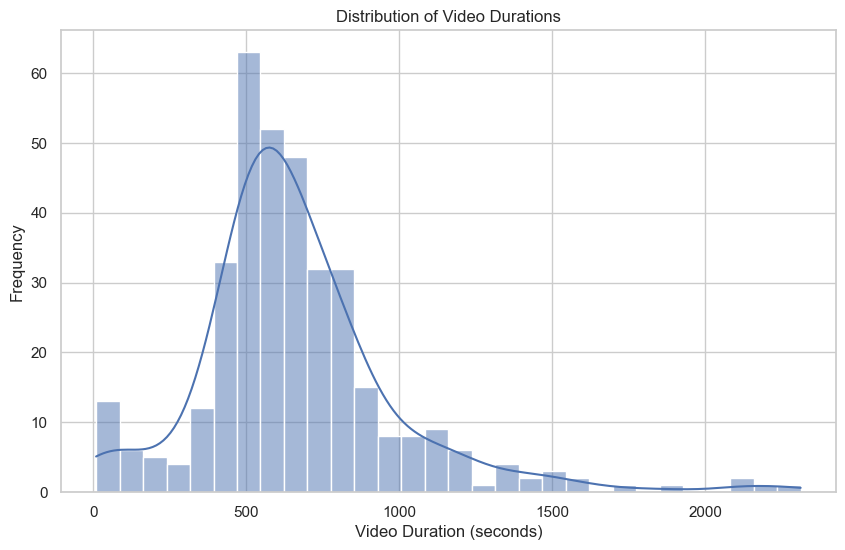

In [24]:
 plt.figure(figsize=(10, 6))
 sns.histplot(df['Video Duration'], bins=30, kde=True)
 plt.title('Distribution of Video Durations')
 plt.xlabel('Video Duration (seconds)')
 plt.ylabel('Frequency')
 plt.show()

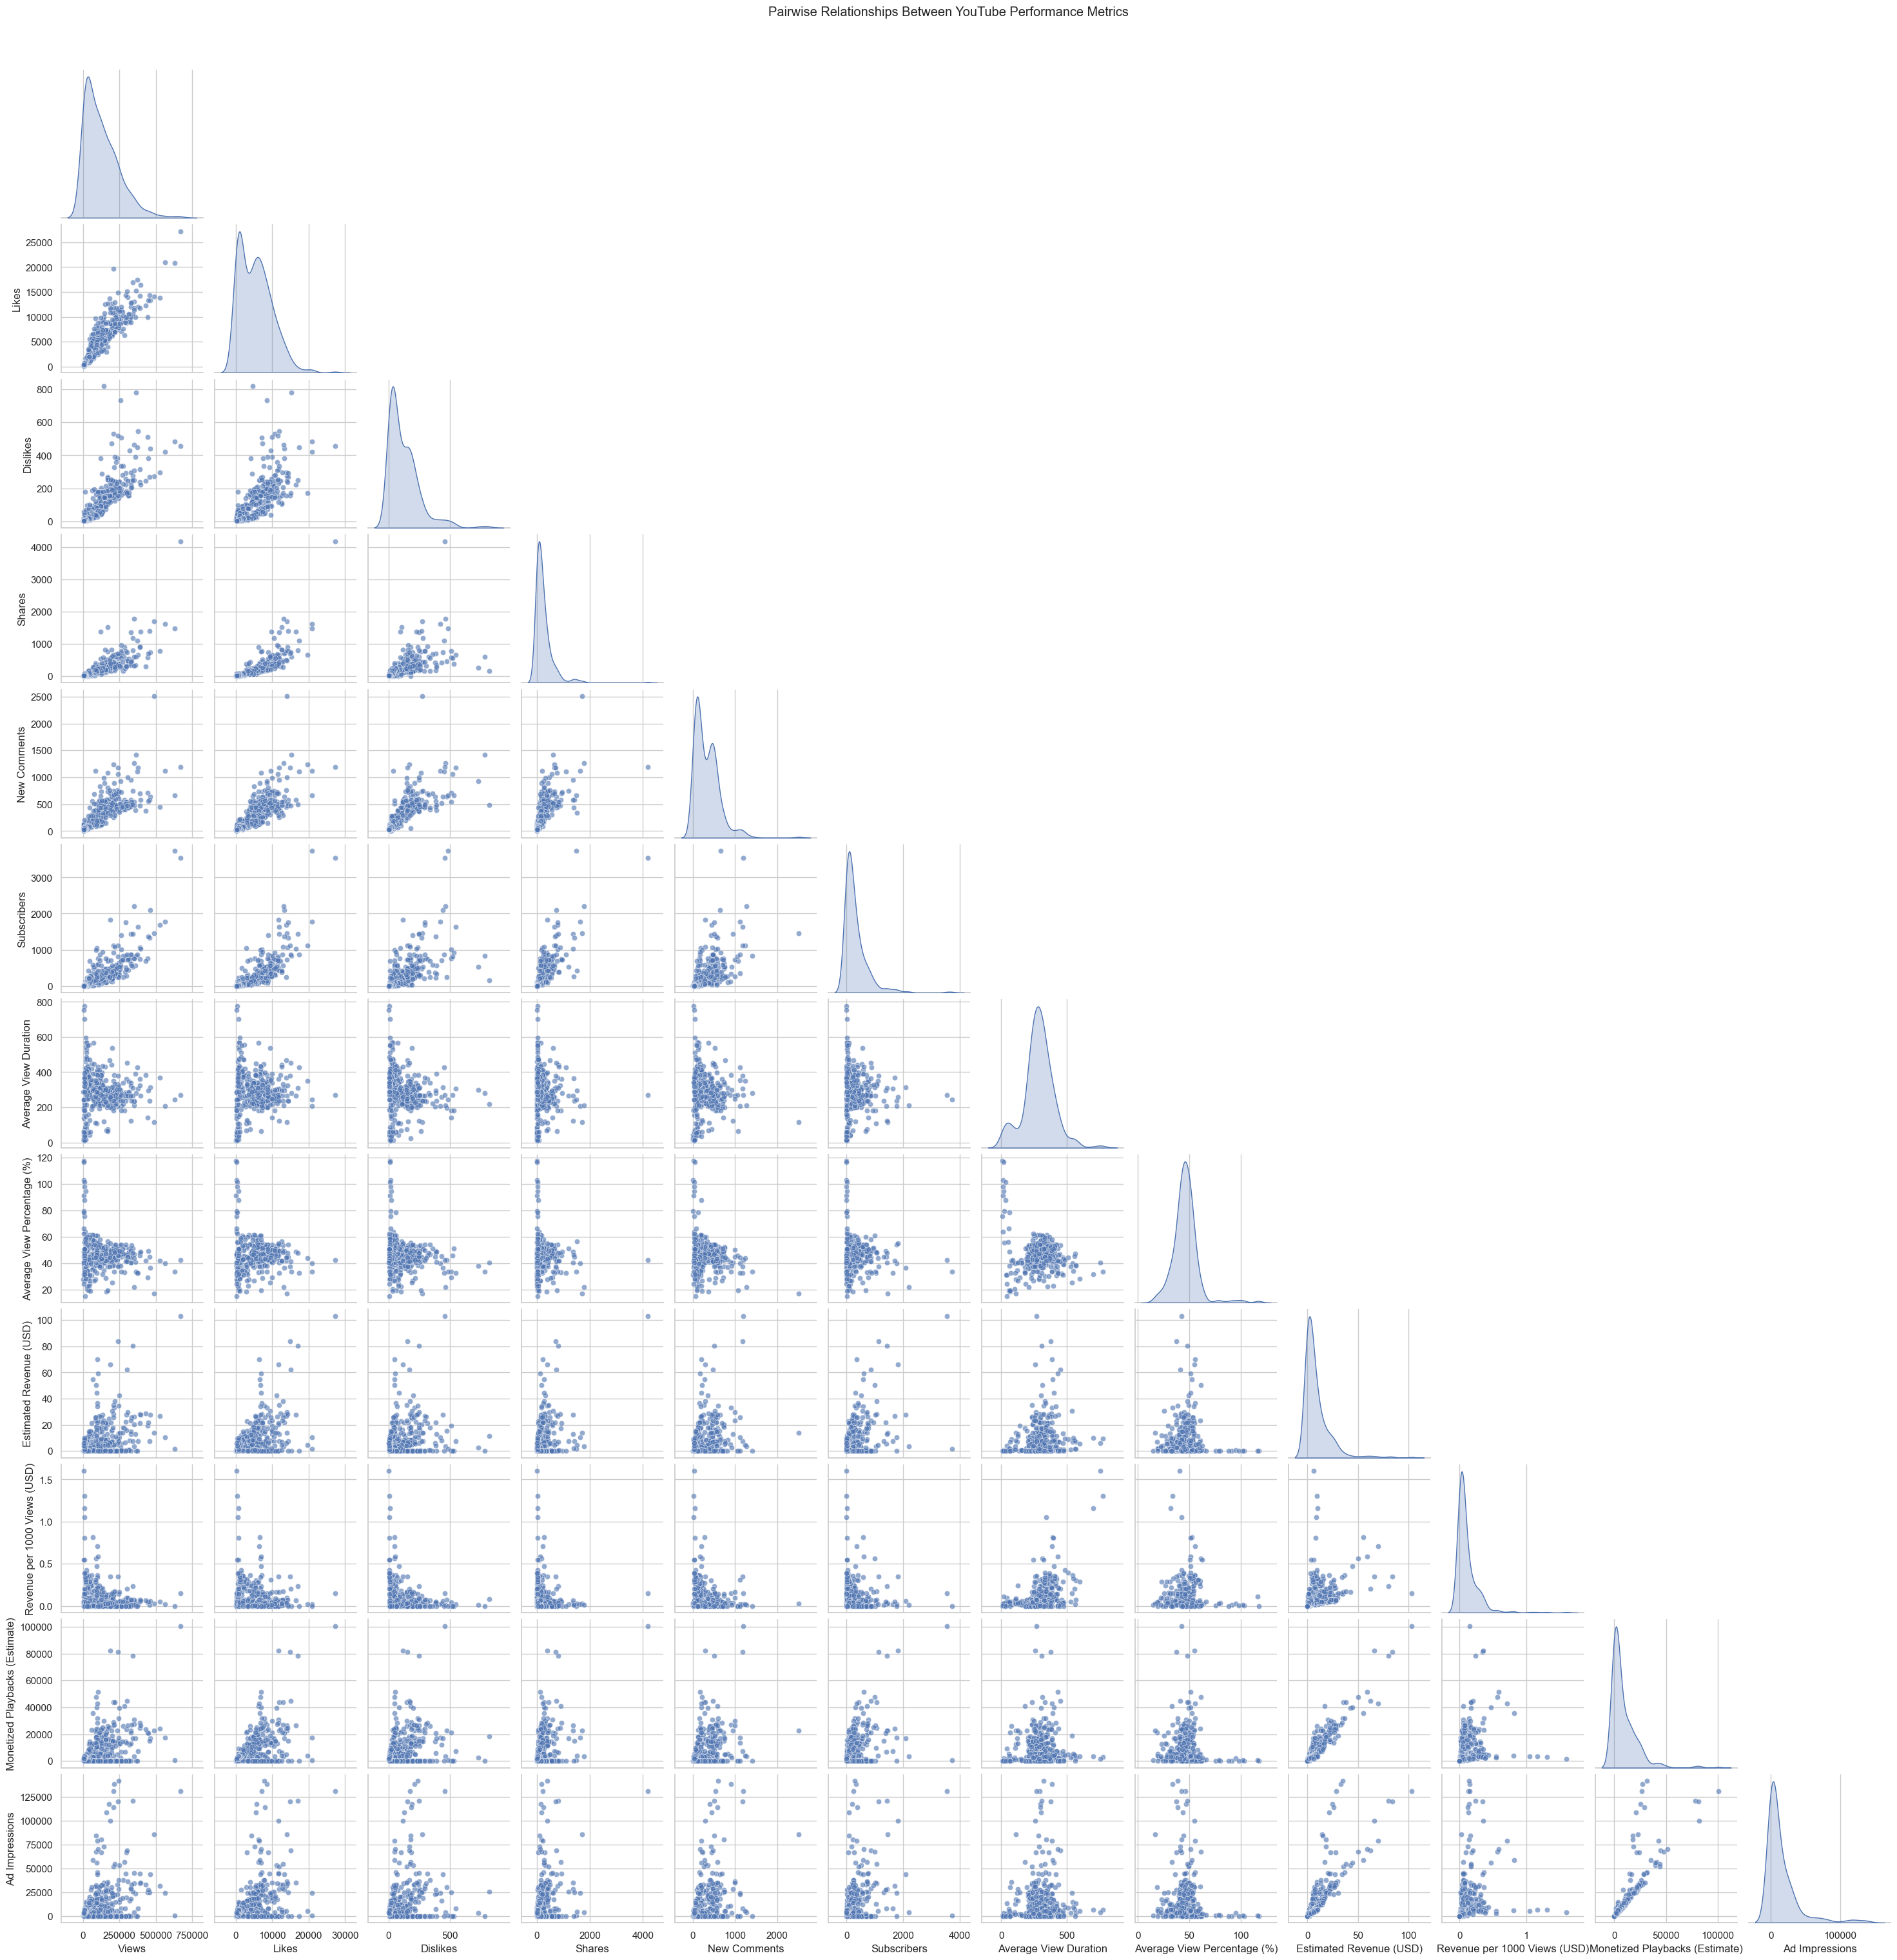

In [6]:
# Select key metrics for the pairplot
pairplot_cols = [
    'Views', 'Likes', 'Dislikes', 'Shares', 'New Comments',
    'Subscribers', 'Average View Duration', 'Average View Percentage (%)',
    'Estimated Revenue (USD)', 'Revenue per 1000 Views (USD)',
    'Monetized Playbacks (Estimate)', 'Ad Impressions'
]

# Create pairplot
sns.pairplot(df[pairplot_cols], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships Between YouTube Performance Metrics', y=1.02)
plt.show()

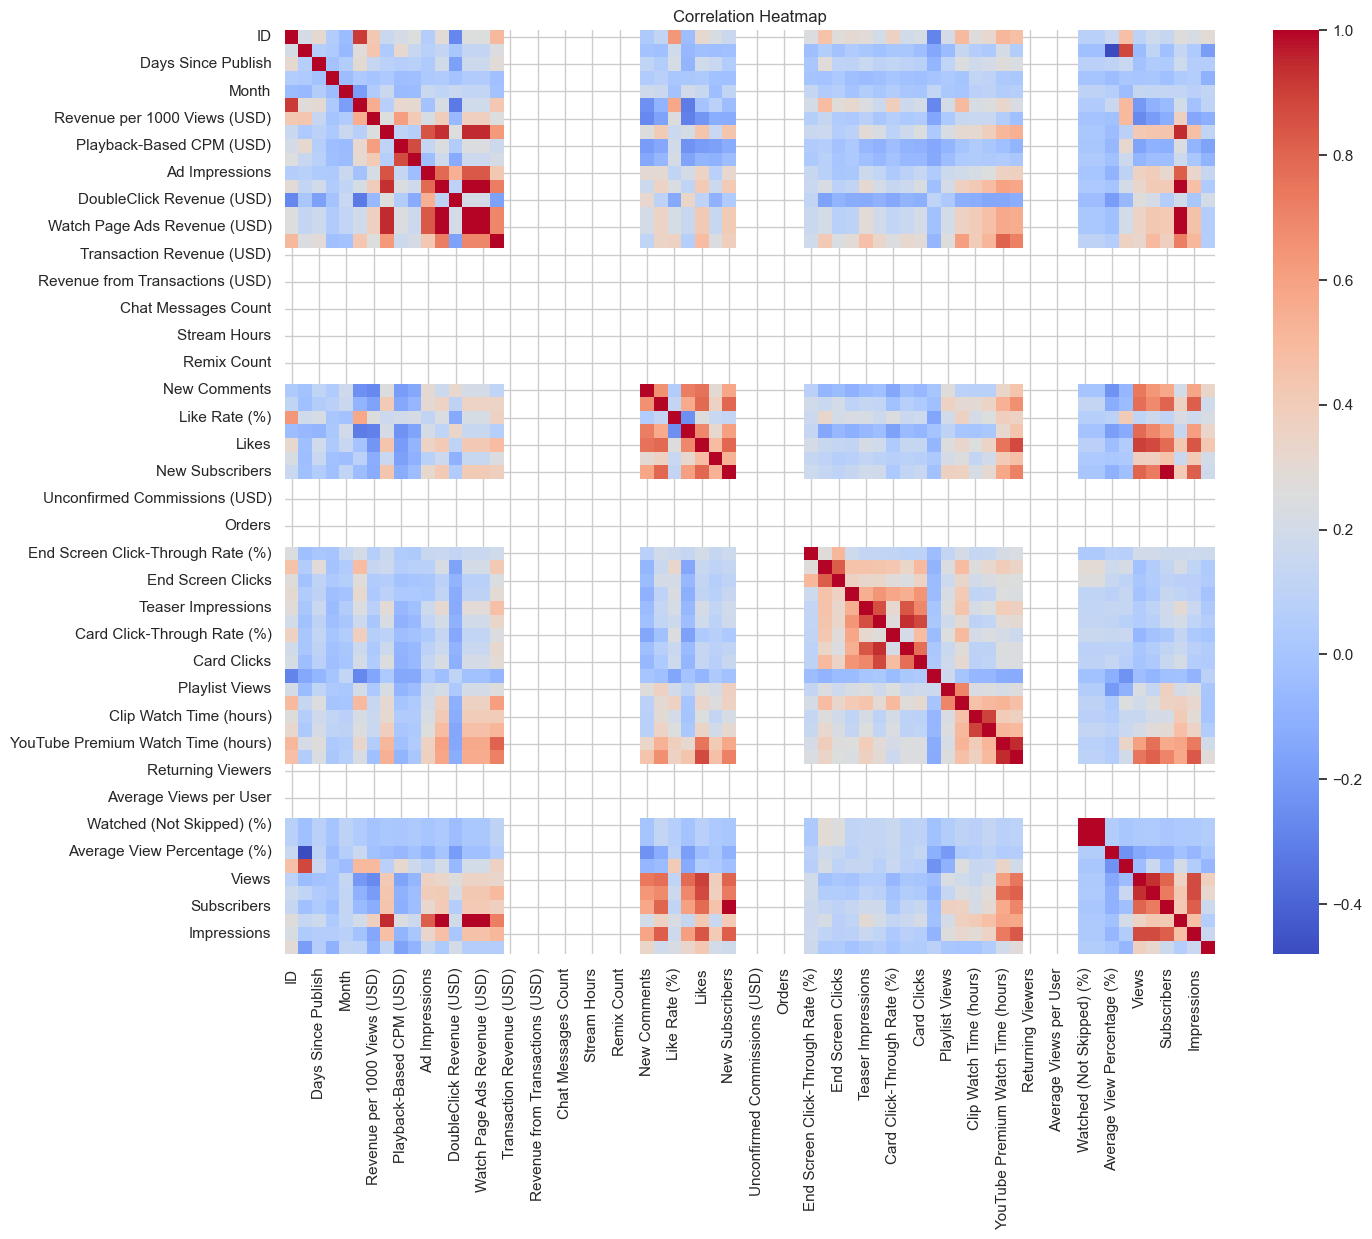

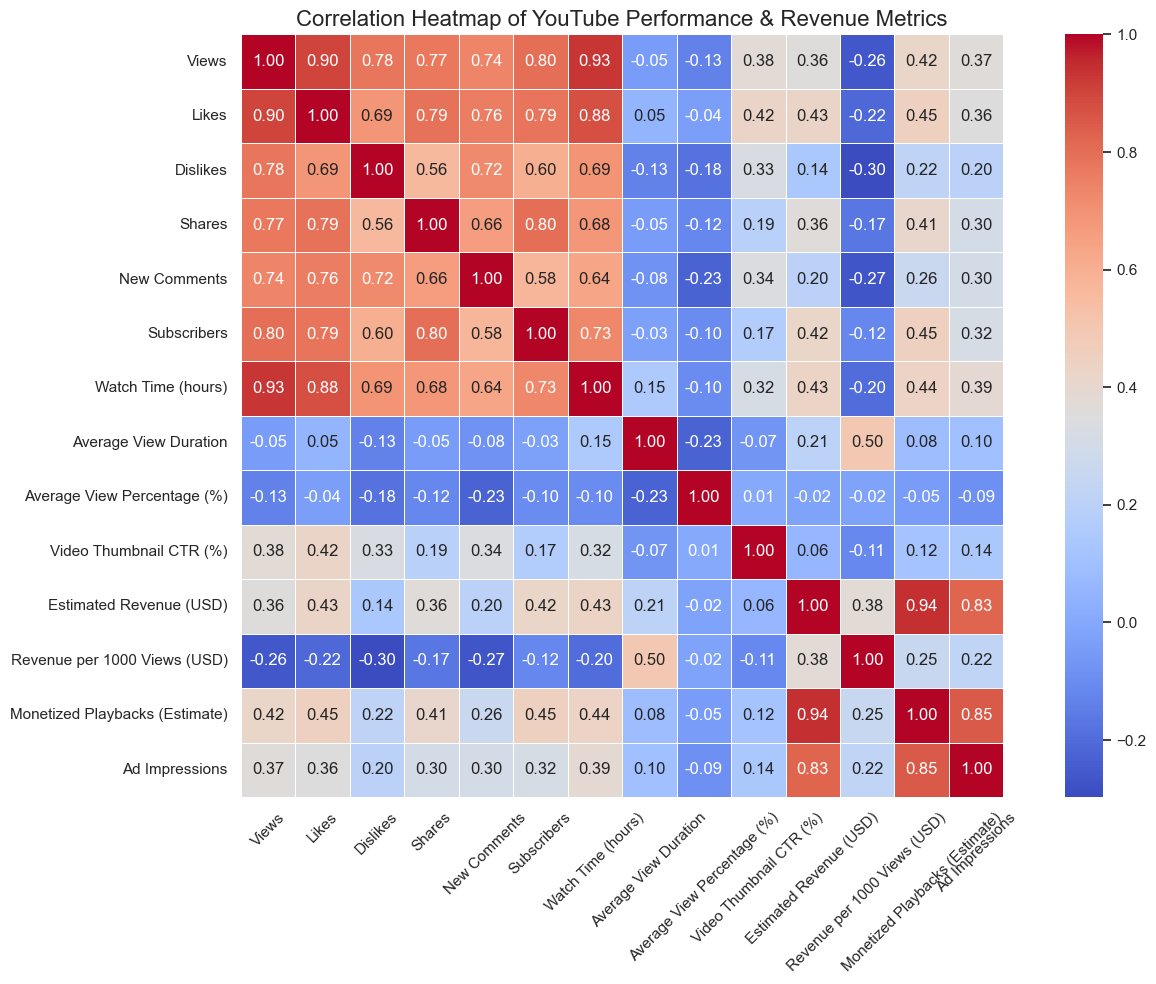

In [26]:
# Select relevant columns for correlation
selected_cols = [
    'Views', 'Likes', 'Dislikes', 'Shares', 'New Comments',
    'Subscribers', 'Watch Time (hours)',
    'Average View Duration', 'Average View Percentage (%)',
    'Video Thumbnail CTR (%)',
    'Estimated Revenue (USD)', 'Revenue per 1000 Views (USD)',
    'Monetized Playbacks (Estimate)', 'Ad Impressions'
]
# Select only numeric columns from your dataset
numeric_df = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Calculate correlation matrix
corr_matrix = df[selected_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap of YouTube Performance & Revenue Metrics', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
# Sort videos by estimated revenue
top_revenue_videos = df.sort_values(by='Estimated Revenue (USD)', ascending=False)
top_revenue_videos[['ID', 'Views', 'Estimated Revenue (USD)', 
                    'Monetized Playbacks (Estimate)', 'Ad Impressions']].head(10)

,ID,Views,Estimated Revenue (USD),Monetized Playbacks (Estimate),Ad Impressions
228,228,670990.0,103.117,100566.0,131335.0
257,257,241060.0,83.979,81084.0,120182.0
251,251,343319.0,80.265,78246.0,120552.0
289,289,99196.0,70.247,42941.0,79118.0
278,278,188324.0,65.978,82130.0,100223.0
260,260,302999.0,62.047,44690.0,68655.0
293,293,101025.0,59.058,51289.0,70366.0
294,294,67556.0,55.040,35452.0,58497.0
290,290,89284.0,50.344,47690.0,67454.0
284,284,93487.0,44.228,39786.0,56201.0


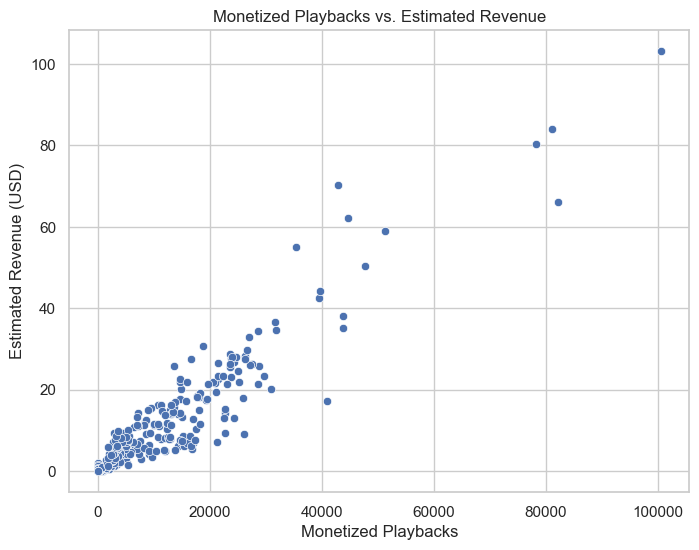

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Monetized Playbacks (Estimate)', y='Estimated Revenue (USD)')
plt.title('Monetized Playbacks vs. Estimated Revenue')
plt.xlabel('Monetized Playbacks')
plt.ylabel('Estimated Revenue (USD)')
plt.show()

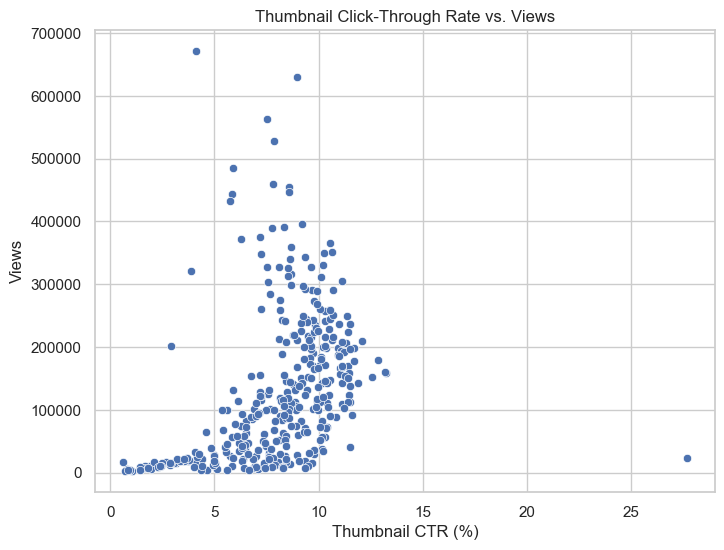

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Video Thumbnail CTR (%)', y='Views')
plt.title('Thumbnail Click-Through Rate vs. Views')
plt.xlabel('Thumbnail CTR (%)')
plt.ylabel('Views')
plt.show()

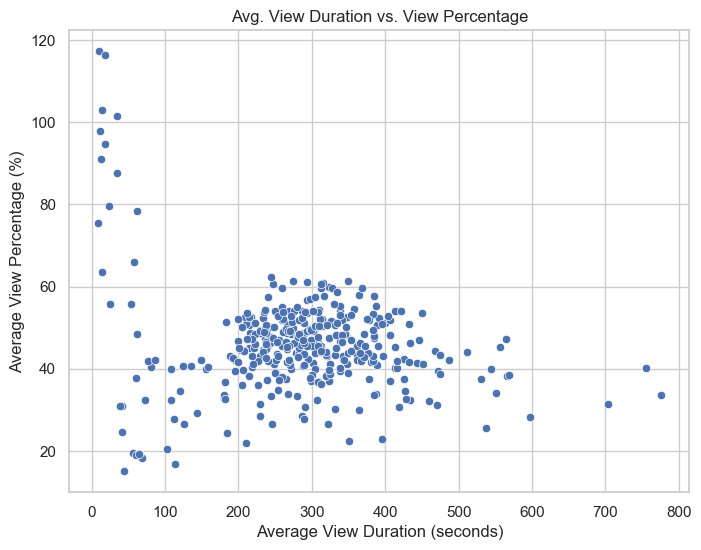

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Average View Duration', y='Average View Percentage (%)')
plt.title('Avg. View Duration vs. View Percentage')
plt.xlabel('Average View Duration (seconds)')
plt.ylabel('Average View Percentage (%)')
plt.show()

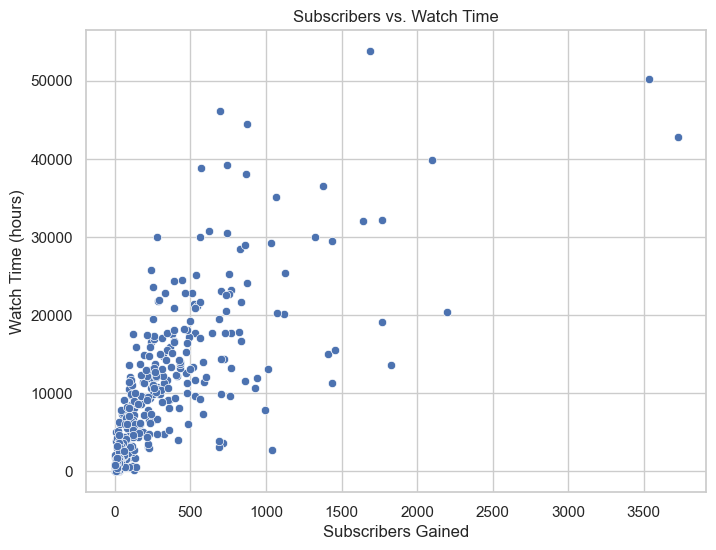

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Subscribers', y='Watch Time (hours)')
plt.title('Subscribers vs. Watch Time')
plt.xlabel('Subscribers Gained')
plt.ylabel('Watch Time (hours)')
plt.show()

In [13]:
# Calculate Revenue per View
df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views']

# Calculate Engagement Rate (%)
df['Engagement Rate (%)'] = (df['Likes'] + df['Shares'] + df['New Comments']) / df['Views'] * 100

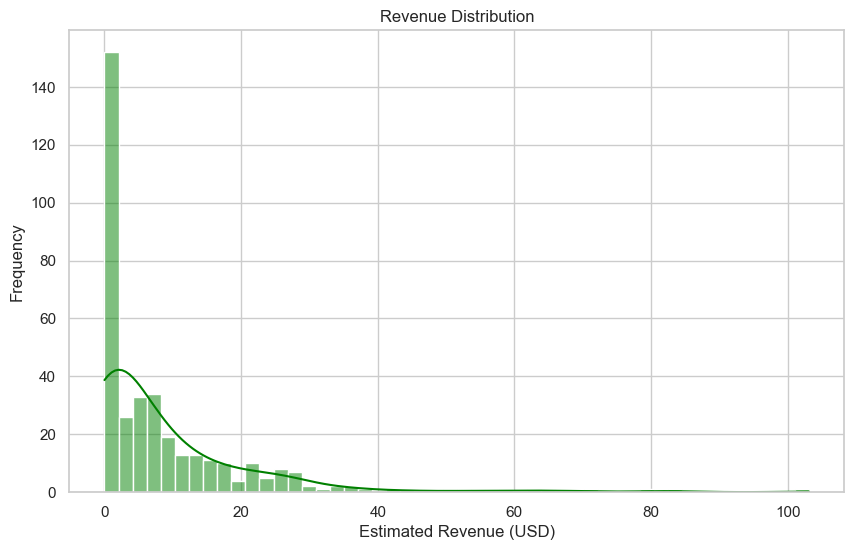

In [14]:
data = pd.read_csv('youtube_channel_real_performance_analytics.csv')
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated Revenue (USD)'], bins=50, kde=True, color='green')
plt.title("Revenue Distribution")
plt.xlabel("Estimated Revenue (USD)")
plt.ylabel("Frequency")
plt.show()

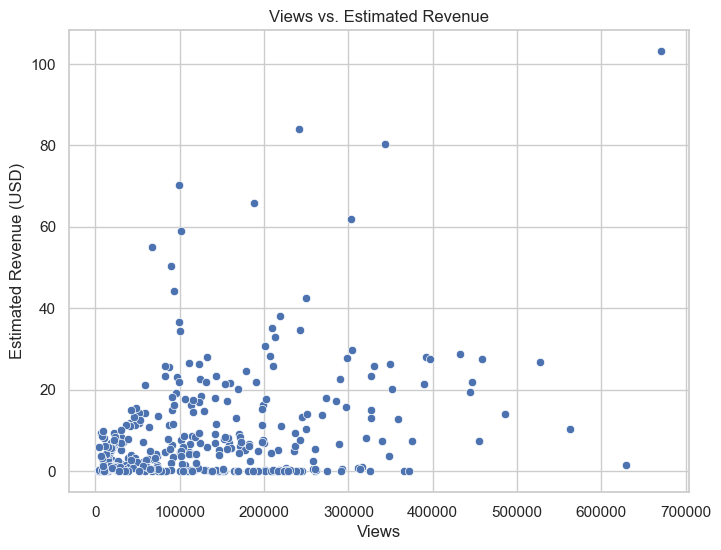

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Views', y='Estimated Revenue (USD)')
plt.title('Views vs. Estimated Revenue')
plt.xlabel('Views')
plt.ylabel('Estimated Revenue (USD)')
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Adjusted features based on your dataset columns
features = ['Views', 'Subscribers', 'Likes', 'Shares']  # Removed 'Comments', 'Engagement Rate'
target = 'Estimated Revenue (USD)'

# Select features and target from your DataFrame
X = data[features]
y = data[target]

# Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")


RMSE: 10.71
R²: -0.32


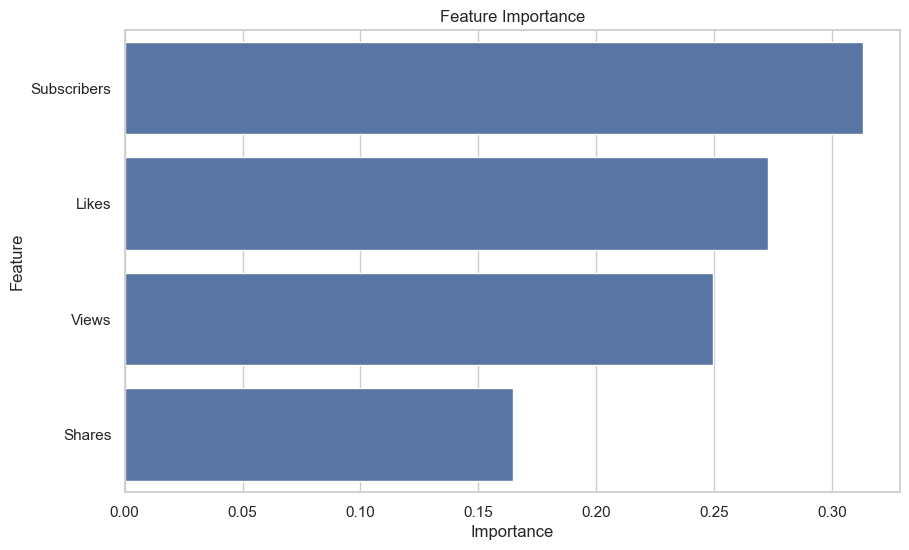

In [23]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort features by importance descending
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:

                                                ###Conclusion###

Analyzed YouTube video metrics to understand engagement and revenue drivers.

Built models to predict estimated revenue based on key features like views and subscribers.

Identified important factors influencing monetization.

Provides useful insights for content creators and marketers to optimize strategies.

In [ ]:

                                                       ### Future Enhancements  ###

To drive greater value from YouTube analytics and support data-driven content strategy, the following future enhancements are proposed:

1. Cross-Platform Integration
What: Expand the analysis to include metrics from platforms like TikTok, Instagram, and Facebook.
Benefit to Stakeholders:

Enables a holistic view of content performance across all major social media platforms.

Helps marketers and strategists identify which platform yields the highest ROI.

Assists in allocating budget and resources to the most effective channels.

2. Sentiment Analysis on Viewer Comments
What: Use Natural Language Processing (NLP) techniques to analyze sentiment from video comments and feedback.
Benefit to Stakeholders:

Reveals audience sentiment toward content, creators, and brands.

Allows early identification of issues or trends that could affect reputation or performance.

Supports content refinement based on emotional impact and viewer perception.

3. Thumbnail and Title Effectiveness Evaluation
What: Apply computer vision (for thumbnails) and NLP (for titles) to assess what elements increase click-through rates (CTR).
Benefit to Stakeholders:

Improves CTR by optimizing visual and textual presentation of videos.

Empowers content creators with data-backed decisions for better audience engagement.

Enhances branding consistency and viewer attraction strategies.

4. Adaptive Predictive Models
What: Build machine learning models that continuously learn and adapt as new data becomes available.
Benefit to Stakeholders:

Maintains model accuracy as viewer behavior and platform algorithms evolve.

Reduces the need for frequent manual model retraining.

Delivers reliable, up-to-date predictions for revenue and engagement.

5. Real-Time Analytics Dashboard
What: Create an interactive dashboard using tools like Power BI, Tableau, or Dash to monitor video performance in real-time.
Benefit to Stakeholders:

Enables instant access to key performance indicators (KPIs).

Facilitates rapid decision-making and campaign optimization.

Helps content teams respond proactively to trending content or declining performance.

6. Content Recommendation System
What: Build a system that suggests optimal posting times, video topics, and formats based on historical data.
Benefit to Stakeholders:

Boosts audience engagement by aligning content with viewer interests and behavior patterns.

Streamlines the content planning process for creators and strategists.

Supports consistent growth in views, watch time, and monetization.

7. Explainable AI (XAI) Integration
What: Use tools like SHAP (SHapley Additive exPlanations) or LIME to make machine learning outputs interpretable.
Benefit to Stakeholders:

Increases trust and transparency in automated predictions.

Provides actionable insights, such as why a video earned more revenue or gained more views.

Enables non-technical decision-makers to understand model reasoning and act confidently.

    
                                                        ### Summary ###
    
These enhancements aim to elevate the project's long-term value by increasing prediction accuracy, broadening scope, enhancing interpretability, and 
enabling smarter, faster decisions. By implementing them, stakeholders can better understand viewer behavior, fine-tune monetization strategies, and 
strengthen the impact of their digital content.

